In [ ]:
!pip install tensorflow

In [ ]:
pip install scikeras

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Importing required libraries

import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
print(keras.__version__)
print(tf.__version__)

3.5.0
2.17.1


In [ ]:
df = pd.read_csv('Alphabets_data.csv')

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.shape

(20000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df['letter'].value_counts()

,count
letter,
U,813
D,805
P,803
T,796
M,792
A,789
X,787
Y,786
N,783


In [ ]:
df.nunique()

,0
letter,26
xbox,16
ybox,16
width,16
height,16
onpix,16
xbar,16
ybar,16
x2bar,16
y2bar,16


In [ ]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [ ]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


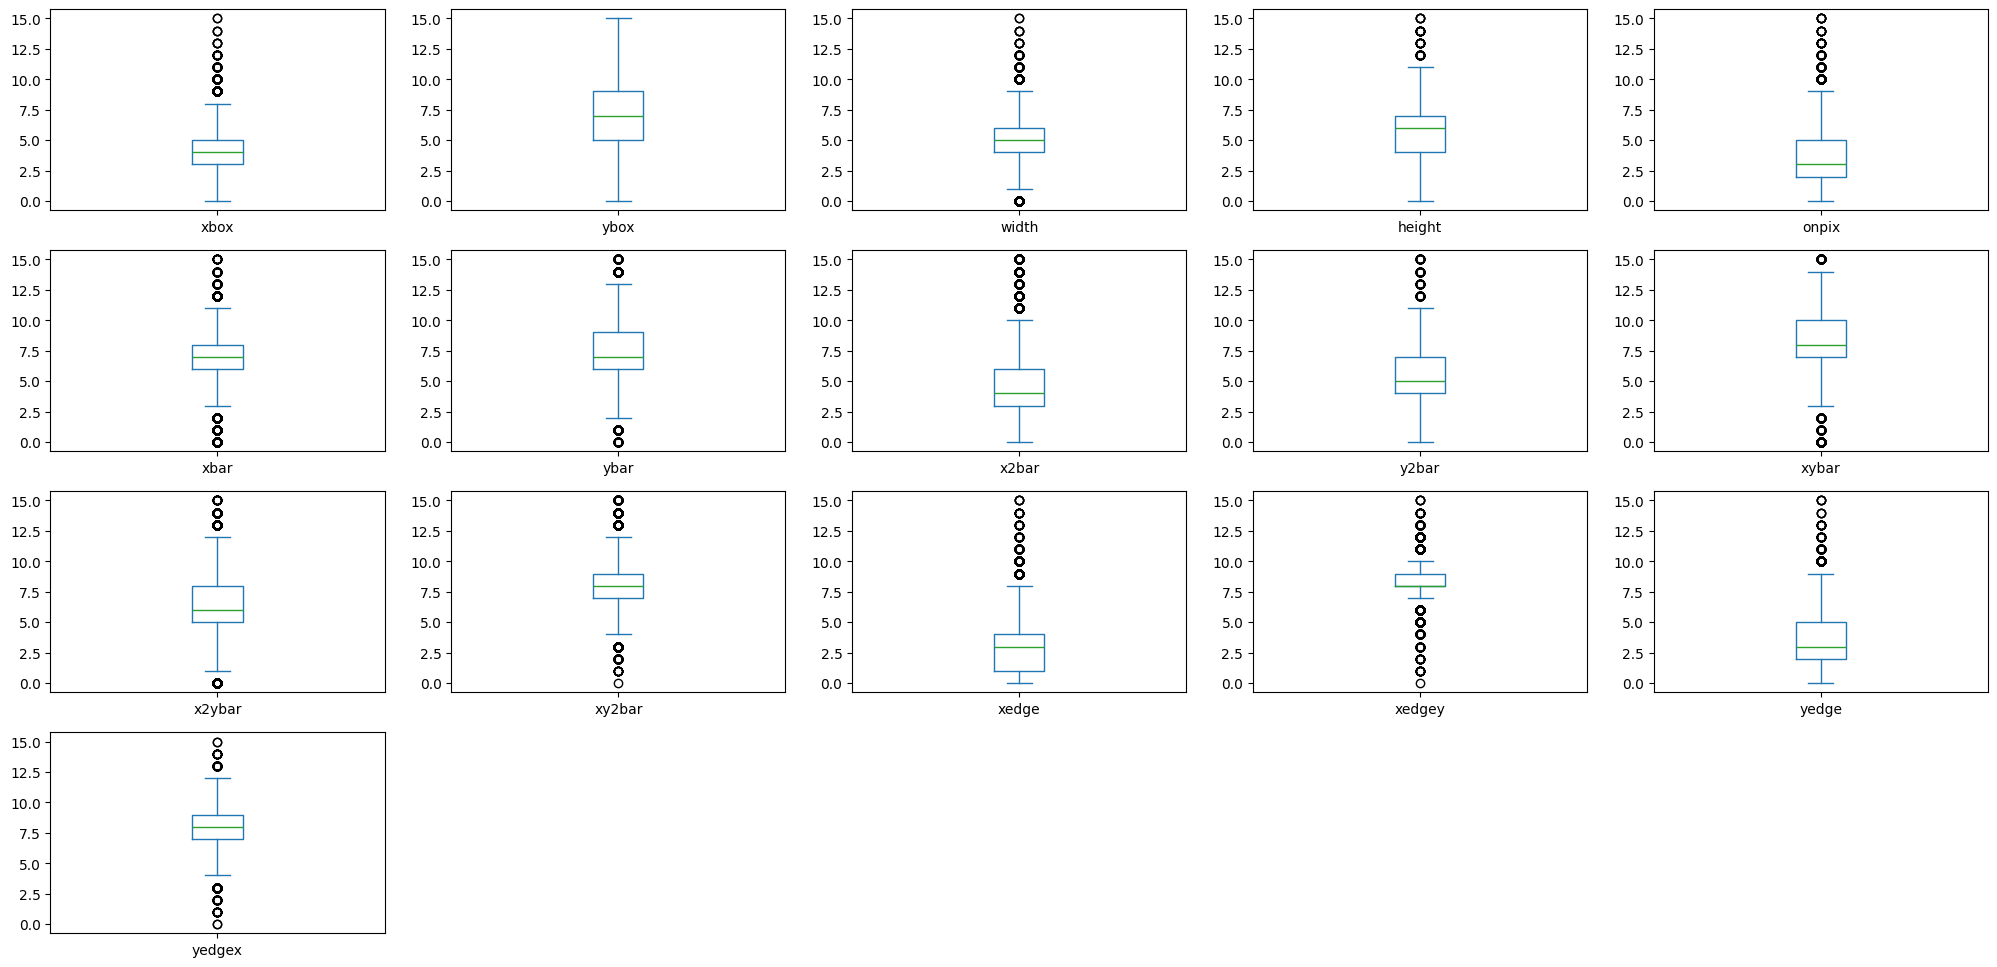

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(25,12))
plt.show()

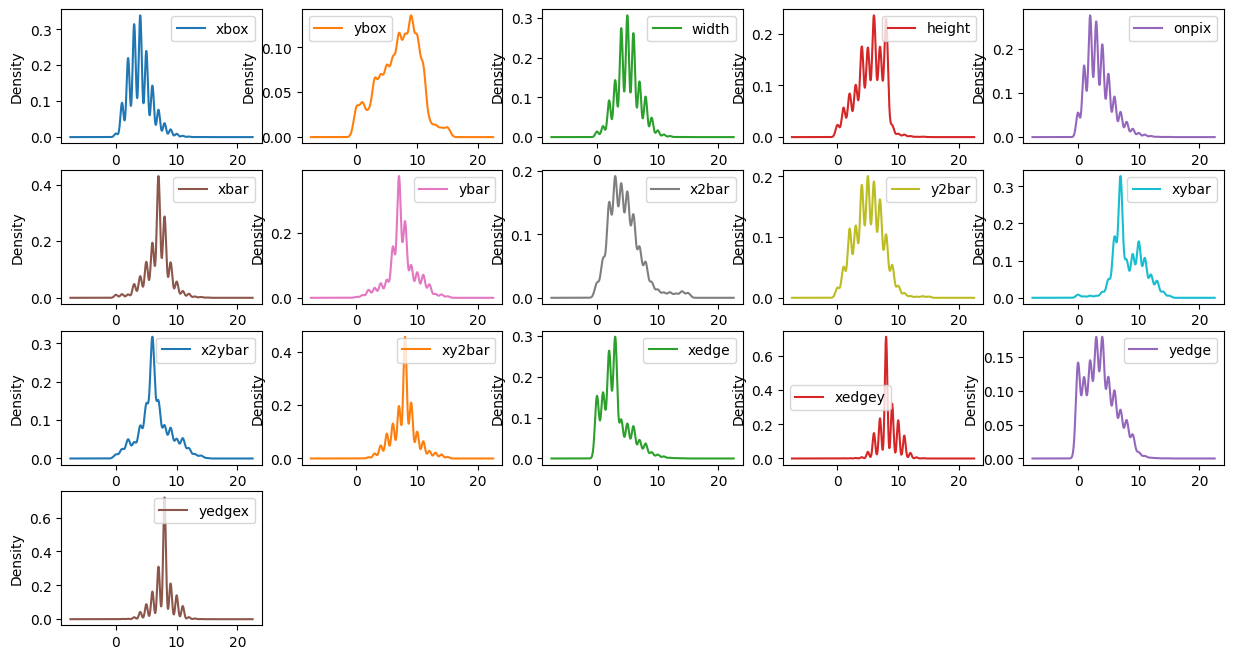

In [ ]:
df.plot(kind='density',subplots=True,layout=(4,5),sharex=False, figsize=(15,8))
plt.show()


In [ ]:
#Encoding Categorical Variable letter
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()

df['letter'] = LE1.fit_transform(df['letter'])



In [ ]:
# Now lets seprate our data into dependent and independent variable

X = df.drop(['letter'], axis=1)
Y =df['letter']

In [ ]:
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
Y.head()

,letter
0,19
1,8
2,3
3,13
4,6


In [ ]:
# Data normalization

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

# Model Building

In [ ]:
# Spliting data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [ ]:
#Initialising ANN

ann = tf.keras.models.Sequential()

 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
ann.fit(X_train,Y_train,batch_size=50,epochs = 20)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0325 - loss: -3.5414
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0412 - loss: -216.0276
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0405 - loss: -1714.7821
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0353 - loss: -5898.2534
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0367 - loss: -13310.2461
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0397 - loss: -25059.6504
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0395 - loss: -40473.5195
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0380 - loss: -61178.2227
Epoch 9/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0383 - loss: -86193.5078
Epoch 10/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0366 - loss: -115649.6172
Epoch 11/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0378 - loss: -152316.5625
Epo

In [ ]:
y_pred_probs = ann.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Hyperparameter Tuning

In [ ]:
from keras_tuner import RandomSearch

# Function to build a model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(len(df['letter'].unique()), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='ANN_Hyperparameter_Tuning')

tuner.search(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Trial 3 Complete [00h 01m 12s]
val_accuracy: 0.9526666800181071

Best val_accuracy So Far: 0.9645833373069763
Total elapsed time: 00h 04m 53s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
512               |480               |units

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6259 - loss: 1.3402 - val_accuracy: 0.8652 - val_loss: 0.4339
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8909 - loss: 0.3723 - val_accuracy: 0.8963 - val_loss: 0.3036
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9222 - loss: 0.2452 - val_accuracy: 0.9337 - val_loss: 0.2038
Epoch 4/10
  1/500 ━━━━━━━━━━━━━━━━━━━━ 10:40 1s/step - accuracy: 0.9375 - loss: 0.2309

# Evaluation

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the predicted probabilities
y_pred_probs = ann.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Print the classification report
print(classification_report(Y_test, y_pred))